##                            TEXAS Accidents data Analysis and visualization

#### PROJECT SUMMARY: Analysing the Texas state Accident data between Jun 2016 to December 2019. The data set containes 298062 observations and 49 variables which is 50mb size file. As part of the project i will be working on analyzing the data pattern of the accident data, visualizing, predicting the severity accuracy using the Regression and KNearest Neighbor Machine learning alogorithms, and time series analysis of the data.

In [324]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [731]:
# Importing the various Libraries
import numpy as np
import pandas as pd
import geopandas 
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import seaborn as sns
from datetime import  date
import geoplot as gplt
%matplotlib inline
plt.style.use('ggplot')

# Importing the Texas Accident Data csv file
df = pd.read_csv("US_Accidents_Dec19_TX_Cleaned.csv",  parse_dates=['Start_Time'],index_col=0)
# Returning the top 5 records
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,County,Zipcode,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,geometry
261007,2,2016-11-30 16:03:54,2016-11-30 17:20:00,30.336502,-97.755646,R,Austin,Travis,78731,2016-11-30 15:51:00,66.0,24.0,30.01,10.0,NNW,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,POINT (-97.755646 30.33650200000001)
261008,2,2016-11-30 16:32:18,2016-11-30 17:47:02,30.328165,-97.694305,L,Austin,Travis,78752-2826,2016-11-30 16:51:00,62.1,25.0,30.03,10.0,North,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,POINT (-97.694305 30.328165)
261009,2,2016-11-30 16:31:45,2016-11-30 17:46:34,30.326077,-97.692307,R,Austin,Travis,78752,2016-11-30 16:51:00,62.1,25.0,30.03,10.0,North,Clear,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,POINT (-97.692307 30.326077)
261010,2,2016-11-30 16:06:49,2016-11-30 17:27:00,32.856014,-97.513084,R,Fort Worth,Tarrant,76135,2016-11-30 16:00:00,NaN,NaN,NaN,NaN,North,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,POINT (-97.51308400000001 32.856014)
261011,3,2016-11-30 16:35:01,2016-11-30 17:49:39,32.797668,-97.212090,R,Fort Worth,Tarrant,76118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,POINT (-97.21209 32.797668)


In [326]:
# Displaying the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297637 entries, 261007 to 2974072
Data columns (total 33 columns):
Severity                 297637 non-null int64
Start_Time               297637 non-null datetime64[ns]
End_Time                 297637 non-null object
Start_Lat                297637 non-null float64
Start_Lng                297637 non-null float64
Side                     297637 non-null object
City                     297637 non-null object
County                   297637 non-null object
Zipcode                  297637 non-null object
Weather_Timestamp        292848 non-null object
Temperature(F)           291689 non-null float64
Humidity(%)              291434 non-null float64
Pressure(in)             291957 non-null float64
Visibility(mi)           291025 non-null float64
Wind_Direction           292522 non-null object
Weather_Condition        290881 non-null object
Amenity                  297637 non-null int64
Bump                     297637 non-null int64
Crossing

In [732]:
# Convert Start_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
# Convert End_Time to datetypes
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

In [347]:
# Double checking the dataframe and the datatype changes
(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297637 entries, 261007 to 2974072
Data columns (total 33 columns):
Severity                 297637 non-null int64
Start_Time               297637 non-null datetime64[ns]
End_Time                 297637 non-null datetime64[ns]
Start_Lat                297637 non-null float64
Start_Lng                297637 non-null float64
Side                     297637 non-null object
City                     297637 non-null object
County                   297637 non-null object
Zipcode                  297637 non-null object
Weather_Timestamp        292848 non-null object
Temperature(F)           291689 non-null float64
Humidity(%)              291434 non-null float64
Pressure(in)             291957 non-null float64
Visibility(mi)           291025 non-null float64
Wind_Direction           292522 non-null object
Weather_Condition        290881 non-null object
Amenity                  297637 non-null int64
Bump                     297637 non-null int64


In [298]:
# Using the pandas_profiling to build a profile report on the dataset
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

Number of variables,34
Number of observations,297637
Total Missing (%),0.4%
Total size in memory,77.2 MiB
Average record size in memory,272.0 B
Numeric,8
Categorical,8
Boolean,16
Date,2
Text (Unique),0
Rejected,0


In [349]:
# importing the Texas state shape file by counties
txShp = geopandas.read_file('./Texas_County_Boundaries/Texas_County_Boundaries.shp')
txShp.head(5)

,OBJECTID,CMPTRL_CNT,CNTY_NM,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,GID,Shape__Are,Shape__Len,geometry
0,1,232,Uvalde,232,48463,232,15,35,5.353346e+09,293254.502147,"POLYGON ((-99.50031 29.08711, -99.50147 29.087..."
1,2,143,Lavaca,143,48285,143,13,36,3.324197e+09,228583.901837,"POLYGON ((-96.86553 29.63014, -96.86540 29.630..."
2,3,20,Brazoria,20,48039,20,12,37,5.068515e+09,362185.783290,"POLYGON ((-95.28413 29.59773, -95.28403 29.597..."
3,4,241,Wharton,241,48481,241,13,38,3.738449e+09,291067.695781,"POLYGON ((-96.17527 29.63380, -96.17501 29.633..."
4,5,163,Medina,163,48325,163,15,39,4.583275e+09,299528.362355,"POLYGON ((-99.41315 29.17354, -99.41315 29.180..."


In [350]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Start_Lng, df.Start_Lat))
print(gdf.head())

        Severity          Start_Time            End_Time  Start_Lat  \
261007         2 2016-11-30 16:03:54 2016-11-30 17:20:00  30.336502   
261008         2 2016-11-30 16:32:18 2016-11-30 17:47:02  30.328165   
261009         2 2016-11-30 16:31:45 2016-11-30 17:46:34  30.326077   
261010         2 2016-11-30 16:06:49 2016-11-30 17:27:00  32.856014   
261011         3 2016-11-30 16:35:01 2016-11-30 17:49:39  32.797668   

        Start_Lng Side        City   County     Zipcode    Weather_Timestamp  \
261007 -97.755646    R      Austin   Travis       78731  2016-11-30 15:51:00   
261008 -97.694305    L      Austin   Travis  78752-2826  2016-11-30 16:51:00   
261009 -97.692307    R      Austin   Travis       78752  2016-11-30 16:51:00   
261010 -97.513084    R  Fort Worth  Tarrant       76135  2016-11-30 16:00:00   
261011 -97.212090    R  Fort Worth  Tarrant       76118                  NaN   

        Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
261007            66.0 

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 254 entries, 0 to 253
Data columns (total 12 columns):
OBJECTID      254 non-null int64
CMPTRL_CNT    254 non-null int64
CNTY_NM       254 non-null object
DPS_CNTY_N    254 non-null int64
FIPS_ST_CN    254 non-null object
TXDOT_CNTY    254 non-null int64
TXDOT_DIST    254 non-null int64
GID           254 non-null int64
Shape__Are    254 non-null float64
Shape__Len    254 non-null float64
geometry      254 non-null geometry
Counts        211 non-null float64
dtypes: float64(3), geometry(1), int64(6), object(2)
memory usage: 25.8+ KB


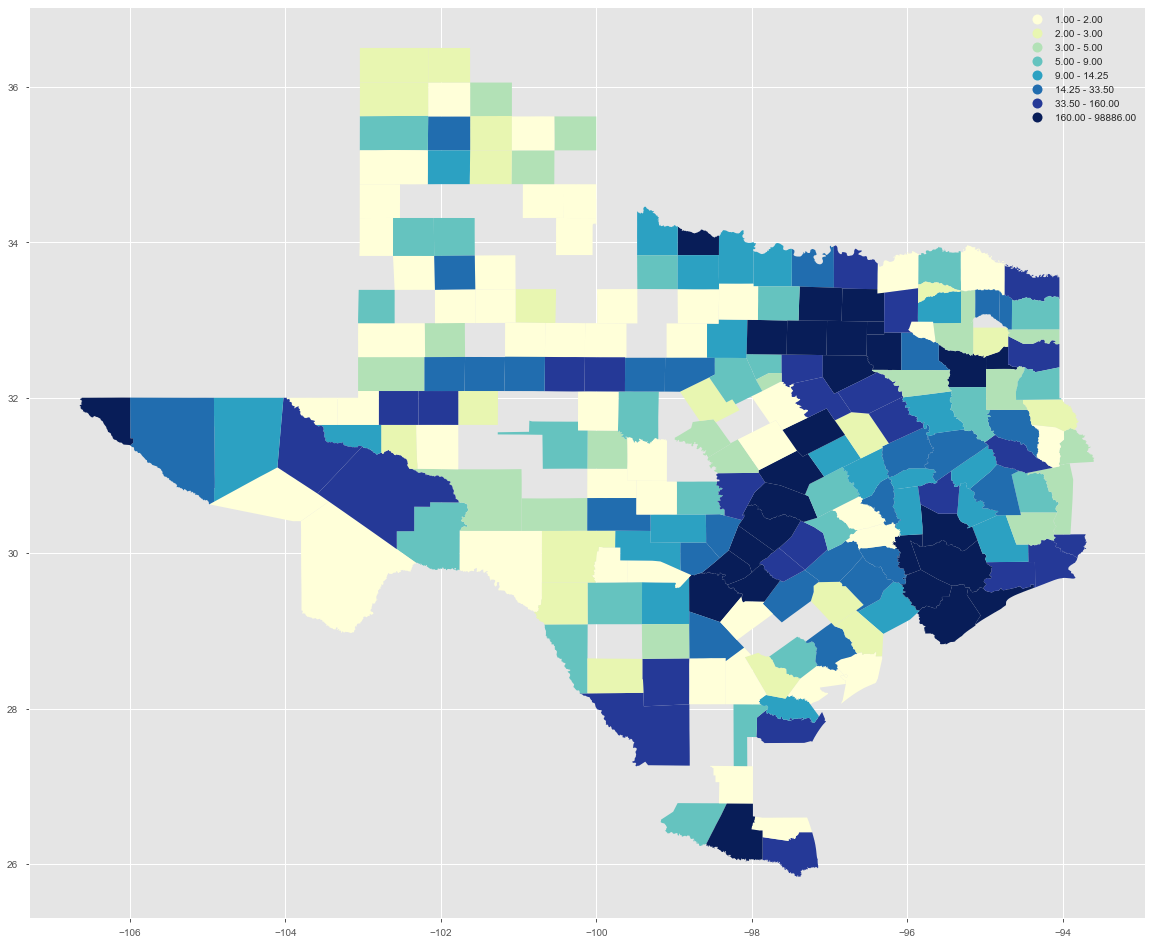

In [351]:
GrpByCounty = df['County'].value_counts().rename_axis('County').to_frame('Counts')
# GrpByCounty.head()
for_plotting = txShp.merge(GrpByCounty, left_on = 'CNTY_NM', right_on = 'County', how='left')
for_plotting.info() 
ax = for_plotting.dropna().plot(column='Counts', cmap = 'YlGnBu', figsize=(20,20), scheme='quantiles', k=8, legend = True);

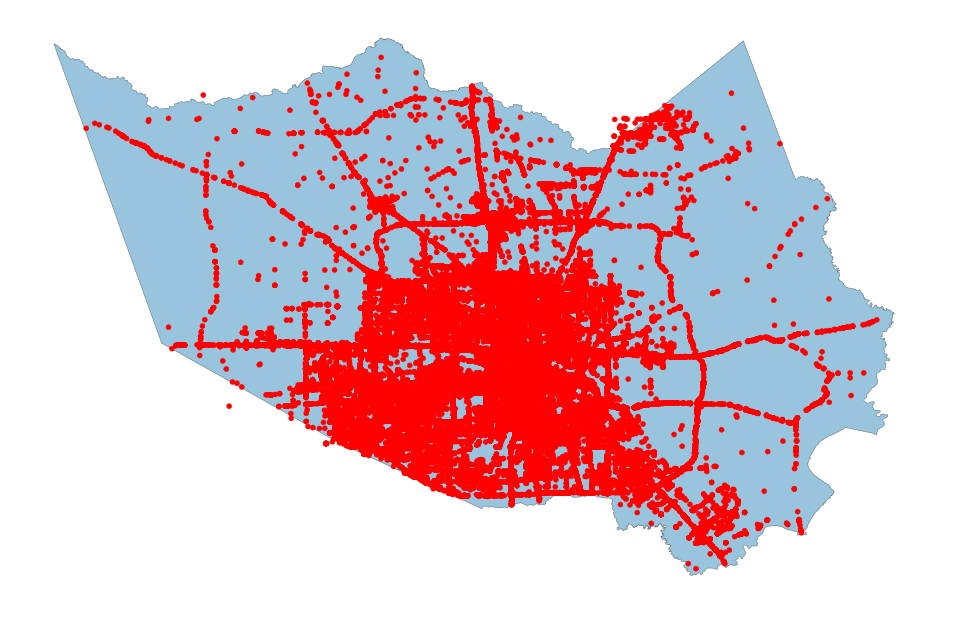

In [355]:
# Visualizing the Harris county Shapefile and Accident data
gdfHarris = gdf[gdf.County == 'Harris']

ax = txShp[txShp.CNTY_NM == 'Harris'].plot(figsize=(17, 17), alpha=0.5, edgecolor='k')

gplt.pointplot(gdfHarris, color='red', ax=ax)

In [359]:
# Check the total number of days involved in the data
print('The Texas dataset contains : ', datetime.date(df['Start_Time'].max()) - datetime.date(df['Start_Time'].min()))

# Check the beginning and end date of this dataset
print('The Texas dataset ontains data beween {} and {}.'.format(df['Start_Time'].min(),df['Start_Time'].max()))

The Texas dataset contains :  1295 days, 0:00:00
The Texas dataset ontains data beween 2016-06-14 20:06:43 and 2019-12-31 21:45:37.


In [738]:
# Extract accident year and add as column to dataframe
df['Accident_Year']=df['Start_Time'].dt.year
# Extract accident Month and add as column to dataframe
df['Accident_Month']=df['Start_Time'].dt.strftime('%b')
# Extract accident Month and add as column to dataframe
df['Accident_Month_Num']=df['Start_Time'].dt.month
# Extract accident day and add as column to dataframe
df['Accident_Day']=df['Start_Time'].dt.day
# Extract accident hour and add as column to dataframe
df['Accident_Hour']=df['Start_Time'].dt.hour
# Extract accident weekday and add as column to dataframe
df['Accident_Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))

# Return the top 5 records of dataframe
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,County,Zipcode,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,geometry,Accident_Year,Accident_Month,Accident_Month_Num,Accident_Day,Accident_Hour,Accident_Weekday,Time_Duration(min)
261007,2,2016-11-30 16:03:54,2016-11-30 17:20:00,30.336502,-97.755646,R,Austin,Travis,78731,2016-11-30 15:51:00,66.0,24.0,30.01,10.0,NNW,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,POINT (-97.755646 30.33650200000001),2016,Nov,11,30,16,Wed,76.0
261008,2,2016-11-30 16:32:18,2016-11-30 17:47:02,30.328165,-97.694305,L,Austin,Travis,78752-2826,2016-11-30 16:51:00,62.1,25.0,30.03,10.0,North,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,POINT (-97.694305 30.328165),2016,Nov,11,30,16,Wed,75.0
261009,2,2016-11-30 16:31:45,2016-11-30 17:46:34,30.326077,-97.692307,R,Austin,Travis,78752,2016-11-30 16:51:00,62.1,25.0,30.03,10.0,North,Clear,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,POINT (-97.692307 30.326077),2016,Nov,11,30,16,Wed,75.0
261010,2,2016-11-30 16:06:49,2016-11-30 17:27:00,32.856014,-97.513084,R,Fort Worth,Tarrant,76135,2016-11-30 16:00:00,NaN,NaN,NaN,NaN,North,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,POINT (-97.51308400000001 32.856014),2016,Nov,11,30,16,Wed,80.0
261011,3,2016-11-30 16:35:01,2016-11-30 17:49:39,32.797668,-97.212090,R,Fort Worth,Tarrant,76118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,POINT (-97.21209 32.797668),2016,Nov,11,30,16,Wed,75.0


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297637 entries, 261007 to 2974072
Data columns (total 40 columns):
Severity                 297637 non-null int64
Start_Time               297637 non-null datetime64[ns]
End_Time                 297637 non-null datetime64[ns]
Start_Lat                297637 non-null float64
Start_Lng                297637 non-null float64
Side                     297637 non-null object
City                     297637 non-null object
County                   297637 non-null object
Zipcode                  297637 non-null object
Weather_Timestamp        292848 non-null object
Temperature(F)           291689 non-null float64
Humidity(%)              291434 non-null float64
Pressure(in)             291957 non-null float64
Visibility(mi)           291025 non-null float64
Wind_Direction           292522 non-null object
Weather_Condition        290881 non-null object
Amenity                  297637 non-null int64
Bump                     297637 non-null int64


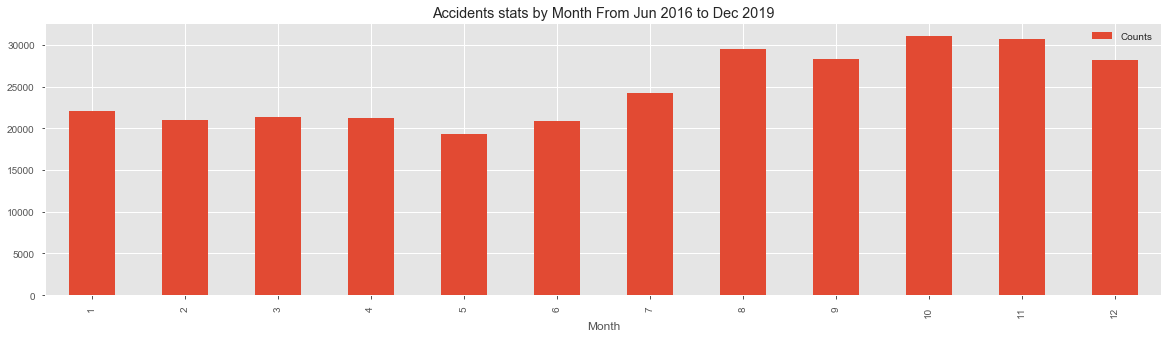

In [375]:
# Bar chart to show the whole Accidents data by 12 months 
df_accidentByMonth= df.Accident_Month_Num.value_counts().sort_values(ascending=False).rename_axis('Month').to_frame('Counts')
df_accidentByMonth.sort_values(by=['Month'], inplace=True)
df_accidentByMonth.plot(kind='bar', width=0.5, figsize=(20,5), title='Accidents stats by Month From Jun 2016 to Dec 2019')

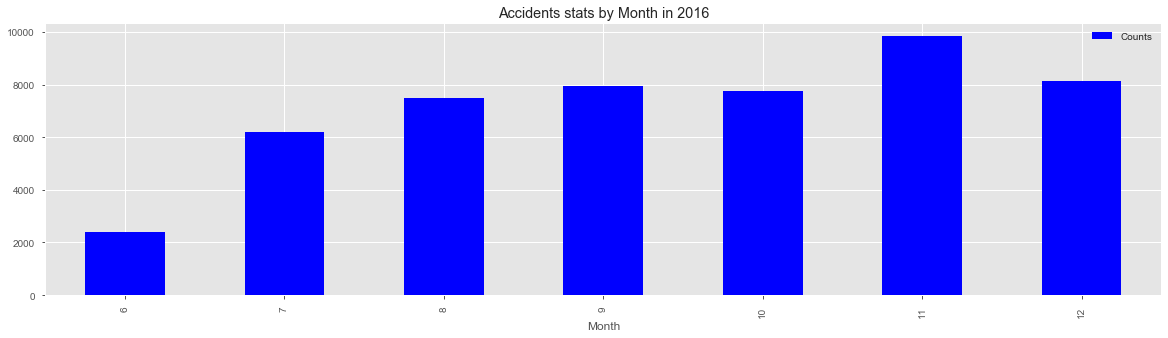

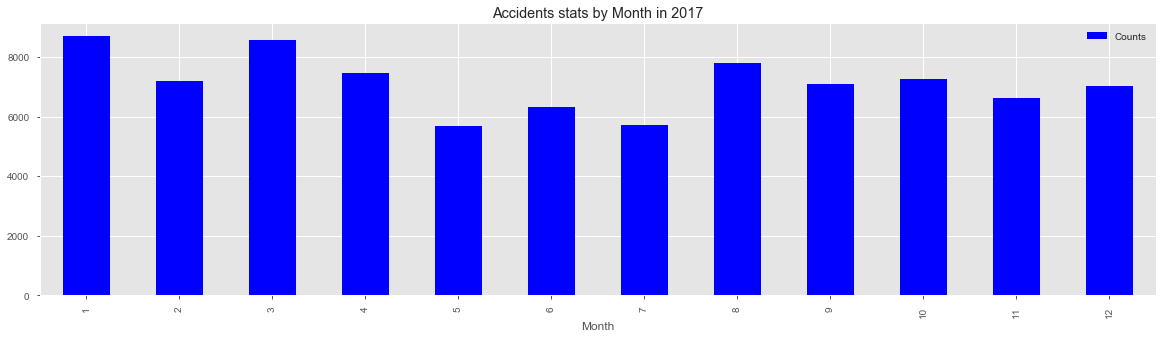

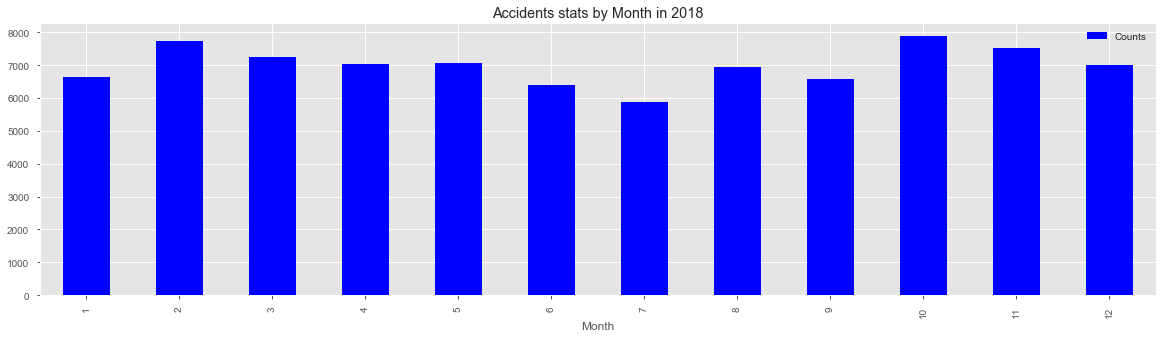

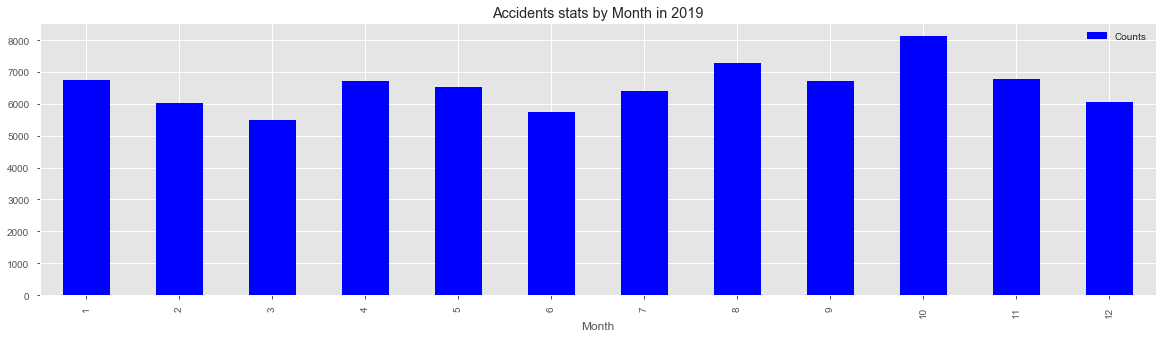

In [376]:
# Bar chart shows the Accidents data by 
AccidentYear = [2016, 2017, 2018, 2019]
for i in range(len(AccidentYear)):
    df_accidentByMonth= df[df['Accident_Year'] == AccidentYear[i]].Accident_Month_Num.value_counts() \
                            .sort_values(ascending=False).rename_axis('Month').to_frame('Counts')
    df_accidentByMonth.sort_values(by=['Month'], inplace=True)
    df_accidentByMonth.plot(kind='bar', width=0.5, color='blue', figsize=(20,5), \
                            title='Accidents stats by Month in '+str(AccidentYear[i]))


In [273]:
df.Side.value_counts().sort_values(ascending=False).rename_axis('RoadSide').to_frame('Accident_Counts')

,Accident_Counts
RoadSide,
R,233874
L,63763


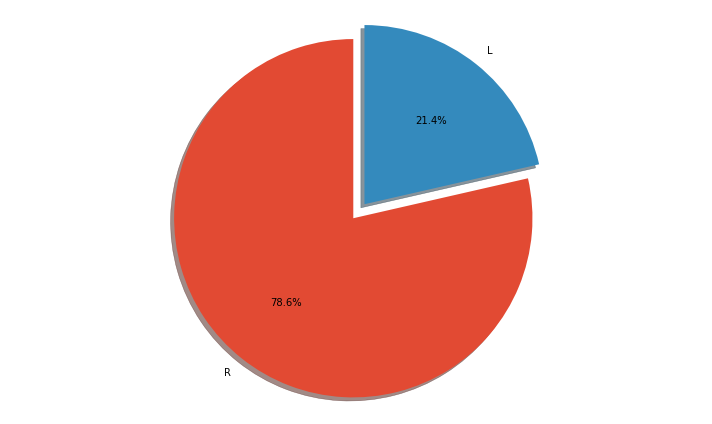

In [293]:
# Building Pie chart to show the percent of accidents happend on which side of the road.
df_accidentByRoadSide= df.Side.value_counts().sort_values(ascending=False).rename_axis('RoadSide').to_frame('Accident_Counts')

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

my_labels = ['R','L']
my_explode = (0, 0.1)
plt.pie( df_accidentByRoadSide['Accident_Counts'], labels= my_labels, shadow=True, startangle=90, autopct='%1.1f%%', explode=my_explode )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()


In [658]:
df_accidentBySeverity =  df.Severity.value_counts().sort_values(ascending=False).rename_axis('Severity').to_frame('Accident_Counts')
df_accidentBySeverity

,Accident_Counts
Severity,
2.0,209399
3.0,76234
4.0,3308
1.0,120


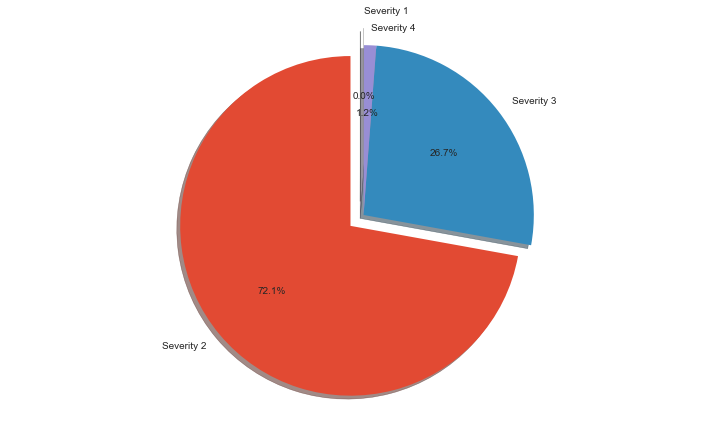

In [373]:
# Draw Pie chart for the data by accident Severity
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))
my_labels = ['Severity 2','Severity 3', 'Severity 4', 'Severity 1']
my_explode = (0.1, 0, 0, 0.1)
plt.pie( df_accidentBySeverity['Accident_Counts'], labels= my_labels, shadow=True, startangle=90, autopct='%1.1f%%', explode=my_explode )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

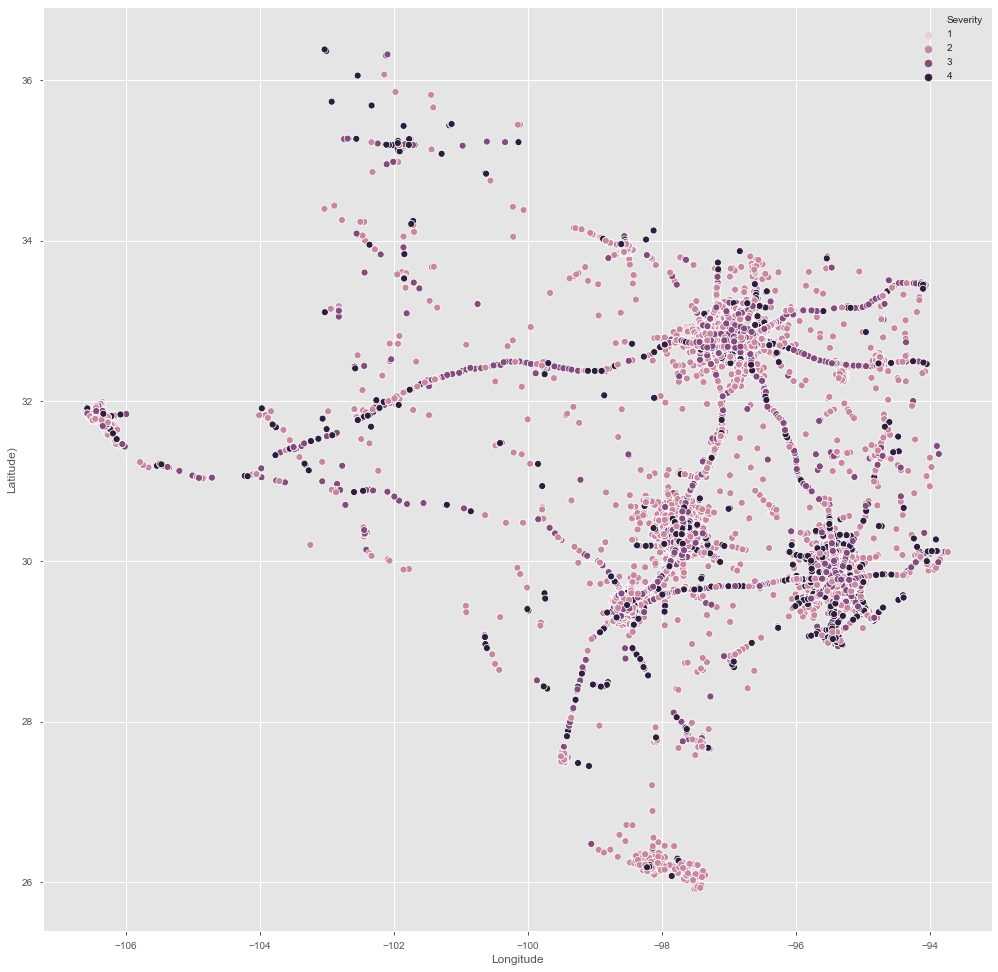

In [378]:
# Visualization: map of accidents by severity
plt.figure(figsize=(17, 17))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

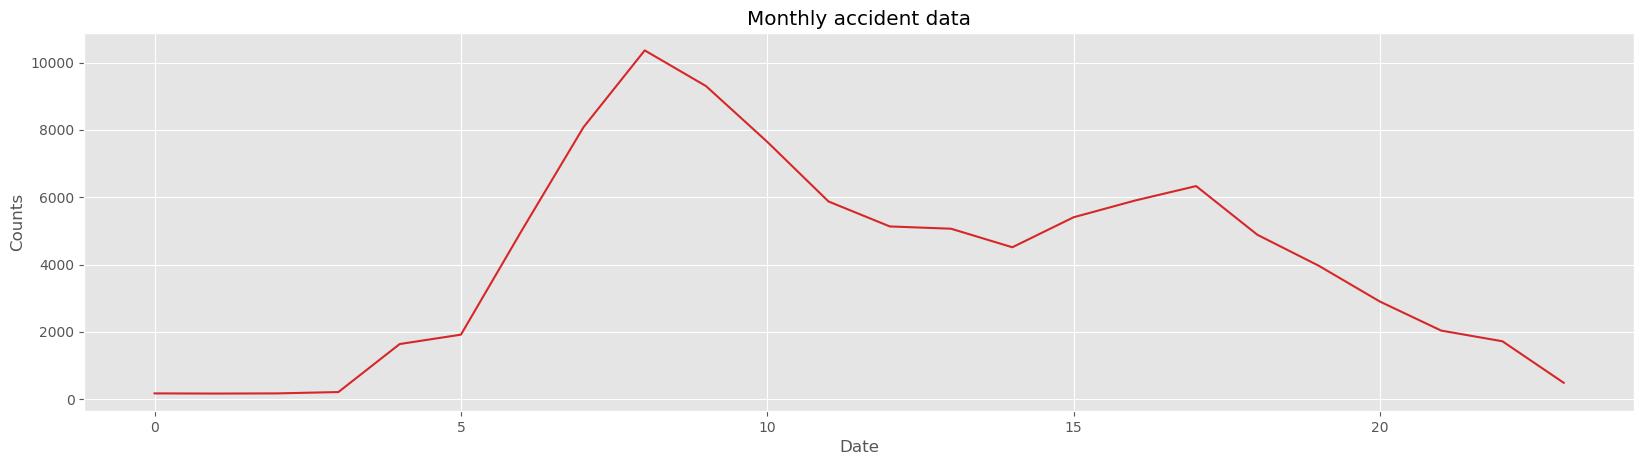

In [104]:
import matplotlib.pyplot as plt

dateArr = ['date', 'month', 'year', 'hour']

from datetime import datetime
# dfs = df.query("County=='Harris'")['Start_Time'].dt.hour.value_counts().rename_axis('Date').to_frame('Counts').sort_values(by='Date')
dfs = df.query("County=='Harris'")['Start_Time'].dt.hour.value_counts().rename_axis('Date').to_frame('Counts').sort_values(by='Date')
dfs.head()

# Draw Plot
def plot_df(dfs, x, y, title="", xlabel='Date', ylabel='Counts', dpi=100):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(dfs, x=dfs.index, y=dfs.Counts, title='Monthly accident data')

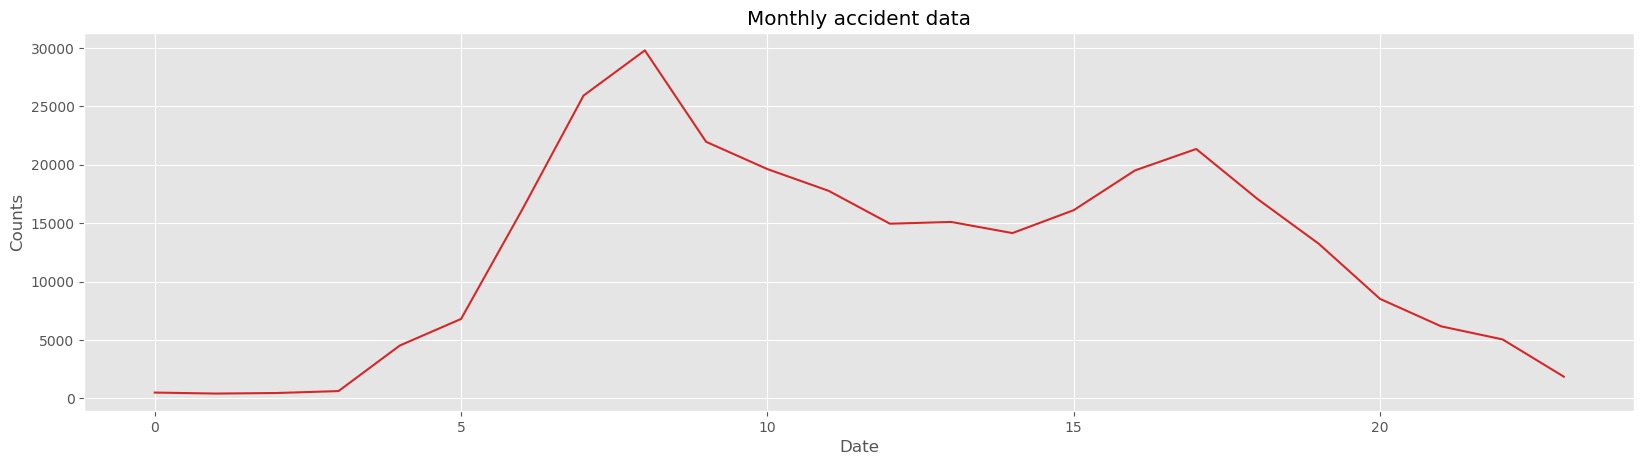

In [140]:
import matplotlib.pyplot as plt


from datetime import datetime
dfs = df['Start_Time'].dt.hour.value_counts().rename_axis('Date').to_frame('Counts').sort_values(by='Date')
dfs.head()

# Draw Plot
def plot_df(dfs, x, y, title="", xlabel='Date', ylabel='Counts', dpi=100):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(dfs, x=dfs.index, y=dfs.Counts, title='Monthly accident data')

In [ ]:
# Draw Plot
def plot_df(dfs, x, y, title="", xlabel='Date', ylabel='Counts', dpi=100):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(dfs, x=dfs.index, y=dfs.Counts, title='Monthly accident data')    

In [606]:
import matplotlib.pyplot as plt


from datetime import datetime
dfs = df['Start_Time'].dt.date.value_counts().rename_axis('Date').to_frame('Counts').sort_values(by='Date')
# print(dfs.head())
dfs = dfs.reset_index()
dfs.columns = ['Date', 'Total_Accident']
# dfs.set_index('Date')
dfs.index

# dfs.dropna()

# dfs = dfs.sort_values(by=['Date'])
# type(dfs)

# print(dfs.info())
# dfs['Date'] = pd.to_datetime(dfs['Date'], errors='coerce')

accidentsByDate = dfs.set_index(pd.to_datetime(dfs['Date'], errors='coerce'))
accidentsByDate.index
# # print(dfs.info())
# # print(dfs.head())

            Counts
Date              
2016-06-14       5
2016-06-17       5
2016-06-21     203
2016-06-22     317
2016-06-23     328


DatetimeIndex(['2016-06-14', '2016-06-17', '2016-06-21', '2016-06-22',
               '2016-06-23', '2016-06-24', '2016-06-25', '2016-06-26',
               '2016-06-27', '2016-06-28',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=1288, freq=None)

In [597]:
# Convert Start_Time to datetypes
accidentsByDateMean = accidentsByDate['Total_Accident'].resample('MS').mean()
accidentsByDateMean.head()
# accidentsByDateMean.info()

Date
2016-06-01    199.833333
2016-07-01    199.612903
2016-08-01    241.645161
2016-09-01    264.200000
2016-10-01    258.600000
Freq: MS, Name: Total_Accident, dtype: float64

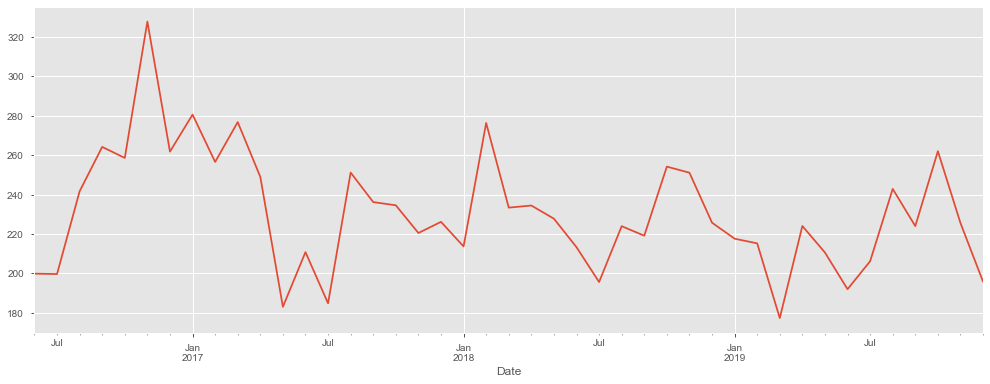

In [598]:
accidentsByDateMean.plot(figsize=(17, 6))
plt.show()

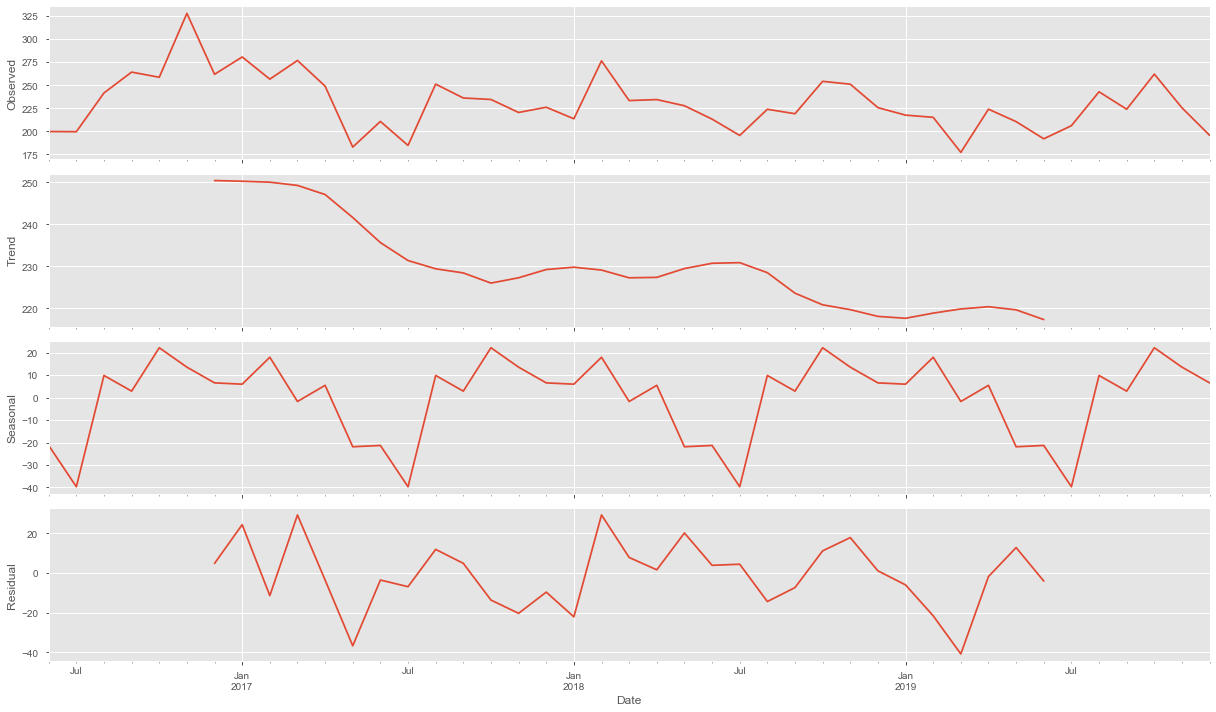

In [628]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 17, 10
decomposition = sm.tsa.seasonal_decompose(accidentsByDateMean, model='additive')
fig = decomposition.plot()
plt.show()

In [629]:
mod = sm.tsa.statespace.SARIMAX(accidentsByDateMean,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3765      0.542     -0.695      0.487      -1.438       0.685
ma.L1          1.0000      0.634      1.577      0.115      -0.242       2.242
ar.S.L12      -0.2446      0.041     -6.033      0.000      -0.324      -0.165
sigma2       413.9510      0.002    2.7e+05      0.000     413.948     413.954


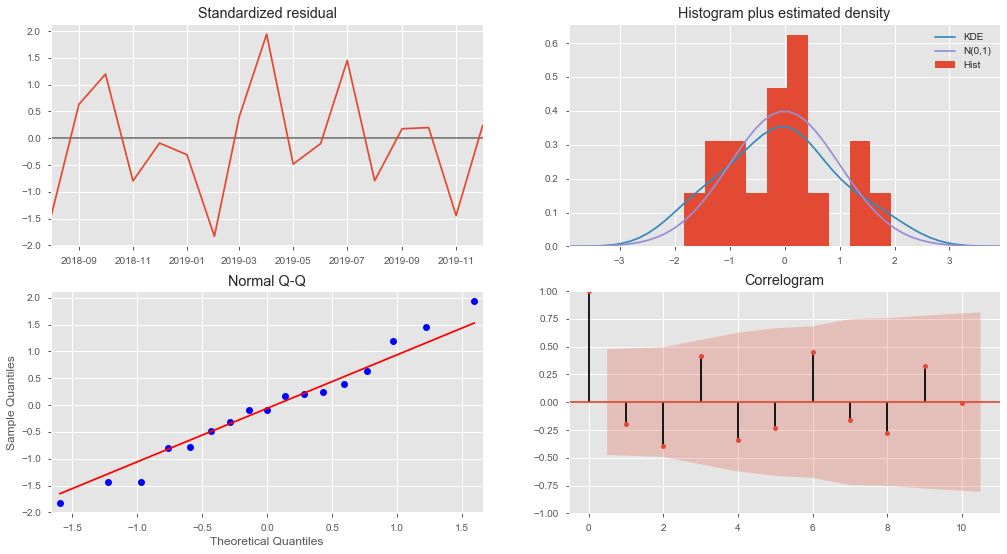

In [631]:
results.plot_diagnostics(figsize=(17, 9))
plt.show()

### Predicting the accident severity with various supervised machine learning algorithms

In [734]:
# Import numpy, pandas, matpltlib.pyplot, sklearn modules and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [766]:
# Check if there is any negative time_duration values
df[td][df[td]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

In [767]:
# Drop the rows with td<0
neg_outliers=df[td]<=0

# Set outliers to NAN
df[neg_outliers] = np.nan

# Drop rows with negative td
df.dropna(subset=[td],axis=0,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297637 entries, 261007 to 2974072
Data columns (total 40 columns):
Severity                 268971 non-null float64
Start_Time               268971 non-null datetime64[ns]
End_Time                 268971 non-null datetime64[ns]
Start_Lat                268971 non-null float64
Start_Lng                268971 non-null float64
Side                     268971 non-null object
City                     268971 non-null object
County                   268971 non-null object
Zipcode                  268971 non-null object
Weather_Timestamp        265010 non-null object
Temperature(F)           264062 non-null float64
Humidity(%)              263820 non-null float64
Pressure(in)             264307 non-null float64
Visibility(mi)           263416 non-null float64
Wind_Direction           264686 non-null object
Weather_Condition        263284 non-null object
Amenity                  268971 non-null float64
Bump                     268971 non-null fl

In [768]:
# Check if there is any negative time_duration values
df[td][df[td]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

In [769]:
# Deal with outliers
# Fill outliers with median values
# Remove outliers for Time_Duration(min): n * standard_deviation (n=3), backfill with median
n=3

median = df[td].median()
std = df[td].std()
outliers = (df[td] - median).abs() > std*n

# Set outliers to NAN
df[outliers] = np.nan

# Fill NAN with median
df[td].fillna(median, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297637 entries, 261007 to 2974072
Data columns (total 40 columns):
Severity                 260067 non-null float64
Start_Time               260067 non-null datetime64[ns]
End_Time                 260067 non-null datetime64[ns]
Start_Lat                260067 non-null float64
Start_Lng                260067 non-null float64
Side                     260067 non-null object
City                     260067 non-null object
County                   260067 non-null object
Zipcode                  260067 non-null object
Weather_Timestamp        256119 non-null object
Temperature(F)           255178 non-null float64
Humidity(%)              254968 non-null float64
Pressure(in)             255431 non-null float64
Visibility(mi)           254537 non-null float64
Wind_Direction           255843 non-null object
Weather_Condition        254408 non-null object
Amenity                  260067 non-null float64
Bump                     260067 non-null fl

In [776]:
# Set the list of features to include in Machine Learning
feature_lst = ["Severity", "Start_Lat", "Start_Lng", "Side", "City", "County", "Zipcode", "Temperature(F)", "Humidity(%)", "Pressure(in)"	, "Visibility(mi)", "Wind_Direction", "Weather_Condition", "Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Sunrise_Sunset", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight"]

# Select the dataset to include only the selected features
df_sel=df[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297637 entries, 261007 to 2974072
Data columns (total 29 columns):
Severity                 260067 non-null float64
Start_Lat                260067 non-null float64
Start_Lng                260067 non-null float64
Side                     260067 non-null object
City                     260067 non-null object
County                   260067 non-null object
Zipcode                  260067 non-null object
Temperature(F)           255178 non-null float64
Humidity(%)              254968 non-null float64
Pressure(in)             255431 non-null float64
Visibility(mi)           254537 non-null float64
Wind_Direction           255843 non-null object
Weather_Condition        254408 non-null object
Amenity                  260067 non-null float64
Bump                     260067 non-null float64
Crossing                 260067 non-null float64
Give_Way                 260067 non-null float64
Junction                 260067 non-null float64
No_Exit

In [777]:
# Check missing values
df_sel.isnull().mean()

Severity                 0.126228
Start_Lat                0.126228
Start_Lng                0.126228
Side                     0.126228
City                     0.126228
County                   0.126228
Zipcode                  0.126228
Temperature(F)           0.142654
Humidity(%)              0.143359
Pressure(in)             0.141804
Visibility(mi)           0.144807
Wind_Direction           0.140419
Weather_Condition        0.145241
Amenity                  0.126228
Bump                     0.126228
Crossing                 0.126228
Give_Way                 0.126228
Junction                 0.126228
No_Exit                  0.126228
Railway                  0.126228
Roundabout               0.126228
Station                  0.126228
Stop                     0.126228
Traffic_Calming          0.126228
Traffic_Signal           0.126228
Sunrise_Sunset           0.126228
Civil_Twilight           0.126228
Nautical_Twilight        0.126228
Astronomical_Twilight    0.126228
dtype: float64

In [778]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(252841, 29)

In [781]:
df_state = df_sel
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252841 entries, 261007 to 2974072
Data columns (total 29 columns):
Severity                 252841 non-null float64
Start_Lat                252841 non-null float64
Start_Lng                252841 non-null float64
Side                     252841 non-null object
City                     252841 non-null object
County                   252841 non-null object
Zipcode                  252841 non-null object
Temperature(F)           252841 non-null float64
Humidity(%)              252841 non-null float64
Pressure(in)             252841 non-null float64
Visibility(mi)           252841 non-null float64
Wind_Direction           252841 non-null object
Weather_Condition        252841 non-null object
Amenity                  252841 non-null float64
Bump                     252841 non-null float64
Crossing                 252841 non-null float64
Give_Way                 252841 non-null float64
Junction                 252841 non-null float64
No_Exit

In [782]:
# Check how many groups of severity and the number of accidents in each group 
df_state.Severity.value_counts().sort_values(ascending=False)

2.0    186838
3.0     64471
4.0      1414
1.0       118
Name: Severity, dtype: int64

In [809]:
df_state.County.value_counts().sort_values(ascending=False).head(25)

Harris        84602
Travis        56883
Dallas        56791
Bexar         20306
Tarrant       10062
El Paso        8526
Williamson     3047
Collin         1933
Denton         1674
Fort Bend      1114
Montgomery     1097
Wichita         810
Hays            558
Brazoria        401
Galveston       394
Rockwall        379
Ellis           351
Bell            248
Comal           234
McLennan        232
Kaufman         229
Hidalgo         169
Smith           165
Guadalupe       159
Gregg           153
Name: County, dtype: int64

In [790]:
df_state.head()

,Severity,Start_Lat,Start_Lng,Side,City,County,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
261007,2.0,30.336502,-97.755646,R,Austin,Travis,78731,66.0,24.0,30.01,10.0,NNW,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261008,2.0,30.328165,-97.694305,L,Austin,Travis,78752-2826,62.1,25.0,30.03,10.0,North,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261009,2.0,30.326077,-97.692307,R,Austin,Travis,78752,62.1,25.0,30.03,10.0,North,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
261012,2.0,32.662193,-96.943153,R,Dallas,Dallas,75249,60.1,24.0,30.00,10.0,Variable,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261013,3.0,32.778790,-96.782021,R,Dallas,Dallas,75226,61.0,22.0,30.01,10.0,NNW,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [796]:
# Generate dummies for categorical data
# Due to the laptop resource issue, here i have taken only Harris County data for the Prediction.
df_state_dummy = pd.get_dummies(df_state.query("County=='Harris'"), drop_first=True)

df_state_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84602 entries, 261018 to 2974072
Columns: 12958 entries, Severity to Weather_Condition_Thunderstorms and Rain
dtypes: float64(23), uint8(12935)
memory usage: 1.0 GB


In [798]:
df_state_dummy.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Side_R,City_Bellaire,City_Channelview,City_Crosby,City_Cypress,City_Deer Park,City_Friendswood,City_Galena Park,City_Highlands,City_Hockley,City_Houston,City_Huffman,City_Humble,City_Jersey Village,City_Katy,City_Kingwood,City_La Porte,City_Missouri City,City_Pasadena,City_Pearland,City_Porter,City_Seabrook,City_South Houston,City_Spring,City_Stafford,City_Tomball,City_Waller,City_Webster,Zipcode_77002-1022,Zipcode_77002-1104,Zipcode_77002-1112,Zipcode_77002-1113,Zipcode_77002-1114,Zipcode_77002-1115,Zipcode_77002-1130,Zipcode_77002-1131,Zipcode_77002-1134,Zipcode_77002-1138,Zipcode_77002-1144,Zipcode_77002-1147,Zipcode_77002-1148,Zipcode_77002-1156,Zipcode_77002-1170,Zipcode_77002-1200,Zipcode_77002-1206,Zipcode_77002-1207,Zipcode_77002-1213,Zipcode_77002-1214,Zipcode_77002-1218,Zipcode_77002-1220,Zipcode_77002-1221,Zipcode_77002-1224,Zipcode_77002-1230,Zipcode_77002-1232,Zipcode_77002-1300,Zipcode_77002-1307,Zipcode_77002-1308,Zipcode_77002-1315,Zipcode_77002-1318,Zipcode_77002-1319,Zipcode_77002-1321,Zipcode_77002-1325,Zipcode_77002-1331,Zipcode_77002-1505,Zipcode_77002-1509,Zipcode_77002-1510,Zipcode_77002-1516,Zipcode_77002-1520,Zipcode_77002-1526,Zipcode_77002-1533,Zipcode_77002-1534,Zipcode_77002-1538,Zipcode_77002-1541,Zipcode_77002-1543,Zipcode_77002-1546,Zipcode_77002-1602,Zipcode_77002-1605,...,Zipcode_77587-4974,Zipcode_77587-5146,Zipcode_77587-5405,Zipcode_77598,Zipcode_77598-1534,Zipcode_77598-1624,Zipcode_77598-1821,Zipcode_77598-2002,Zipcode_77598-2025,Zipcode_77598-2104,Zipcode_77598-2112,Zipcode_77598-2201,Zipcode_77598-2204,Zipcode_77598-2259,Zipcode_77598-2306,Zipcode_77598-2309,Zipcode_77598-2327,Zipcode_77598-2328,Zipcode_77598-2329,Zipcode_77598-2502,Zipcode_77598-2519,Zipcode_77598-2529,Zipcode_77598-2540,Zipcode_77598-3403,Zipcode_77598-3863,Zipcode_77598-4048,Zipcode_77598-5326,Zipcode_77598-6404,Zipcode_77598-6407,Zipcode_77598-6604,Zipcode_77598-6605,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,Weather_Condition_Cloudy,Weather_Condition_Cloudy / Windy,Weather_Condition_Drizzle,Weather_Condition_Drizzle and Fog,Weather_Condition_Fair,Weather_Condition_Fair / Windy,Weather_Condition_Fog,Weather_Condition_Haze,Weather_Condition_Haze / Windy,Weather_Condition_Heavy Drizzle,Weather_Condition_Heavy Rain,Weather_Condition_Heavy Rain / Windy,Weather_Condition_Heavy T-Storm,Weather_Condition_Heavy T-Storm / Windy,Weather_Condition_Heavy Thunderstorms and Rain,Weather_Condition_Light Drizzle,Weather_Condition_Light Freezing Fog,Weather_Condition_Light Freezing Rain,Weather_Condition_Light Ice Pellets,Weather_Condition_Light Rain,Weather_Condition_Light Rain / Windy,Weather_Condition_Light Rain with Thunder,Weather_Condition_Light Snow,Weather_Condition_Light Thunderstorms and Rain,Weather_Condition_Mist,Weather_Condition_Mostly Cloudy,Weather_Condition_Mostly Cloudy / Windy,Weather_Condition_Overcast,Weather_Condition_Partly Cloudy,Weather_Condition_Partly Cloudy / Windy,Weather_Condition_Patches of Fog,Weather_Condition_Rain,Weather_Condition_Rain / Windy,Weather_Condition_Rain Showers,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_Showers in the Vicinity,Weather_Condition_Smoke,Weather_Condition_T-Storm,Weather_Condition_T-Storm / Windy,Weather_Condition_Thunder,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder and H

In [810]:
# Export data
# df_state_dummy.to_csv('US_Accidents_TX_dummy.csv',index=False)

In [799]:
# Assign the dummay data to a dataframe
df=df_state_dummy

# Set the target for the prediction
target='Severity'

# Create arrays for the features and the response variable
# set X and y
y = df[target]
X = df.drop(target, axis=1)

In [801]:
df.Severity.value_counts().sort_values(ascending=False).rename_axis('Severity').to_frame('Accident_Counts')

,Accident_Counts
Severity,
2.0,66662
3.0,17426
4.0,465
1.0,49


In [802]:
# Create arrays for the features and the response variable
# set X and y
y = df['Severity']
X = df.drop('Severity', axis=1)

In [803]:
y.unique()

array([2., 3., 1., 4.])

In [804]:
# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [805]:
# List of classification algorithms
class_algorithms_list=['Logistic Regression',' K-Nearest Neighbors']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

In [806]:
# Logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Logistic regression algorithm] accuracy_score: 0.877.


In [807]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.787.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.787.


#### From the above results, between Logistic Regression and K nearest neighbor accuracy, Logistic regression algorithm predicted with high accuracy rate at 0.87. 